In [4]:
# import modules & set up logging
import gensim, logging
from sortedcontainers import SortedDict
from gensim.models import KeyedVectors
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import unidecode
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
import glob, os

In [5]:
from aligning_embeddings import *
from w2vtransformation import *
from relation import *

In [6]:
import zipfile
import datetime
import urllib.request
import os.path
import matplotlib.pyplot as plt
from umap import UMAP # actually called "umap-learn"
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
def calc_distance_between_vectors(vec1, vec2, distype = 'norm'):
    if distype is 'norm':
        return np.linalg.norm(np.subtract(vec1, vec2))
    else:
        return cossim(vec1, vec2)
    
def _calculateSymetricTransform(A, Ainv, B, Binv):
    '''Given two models (A and B) calculate the symetric version of the
    transformation matrix.'''
    Tab = calculateTransform(A, Ainv, B, Binv, sameVocab=False)
    Tba = calculateTransform(B, Binv, A, Ainv, sameVocab=False)
    TTinv = Tab * Tba
    return TTinv

def cossim(v1, v2, signed = True):
    c = np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
    if not signed:
        return abs(c)
    return c

In [8]:
def testModelConvergence(A, Ainv, B, Binv, vector_size):
    '''Given two models (A and B) and their inverse matrices, calculate the
    convergence between the two models (as a single value).'''
    TTinv = _calculateSymetricTransform(A, Ainv, B, Binv)
    Si_ip = np.trace(TTinv) / vector_size
    return Si_ip

In [32]:
model_ah_nrc_inv = getModelInv(model_ah_nrc)
model_vk_inv = getModelInv(model_vk)

In [33]:
d = testModelConvergence(model_vk, model_vk_inv, model_ah_nrc, model_ah_nrc_inv, model_vk.vector_size)

KeyboardInterrupt: 

In [8]:
model_ah_nrc = smart_procrustes_align_gensim(model_vk, model_ah_nrc)

In [13]:
keys = []
for k in model_vk.vocab:
    keys.append(k)

In [42]:
from random import randint
distances = {}
random = []
for k in keys:
    #random.append(cossim(model_ah_nrc[k], model_vk[keys[randint(0, len(keys) -1)]]))
    distances[k] = cossim(model_ah_nrc[k], model_vk[k])
    

In [28]:
random_keys = random.sample(keys, 500)

In [29]:
from tqdm import tqdm
intersections = []
jaccards = []
def intersection(lst1, lst2): 
    return len([value for value in lst1 if value in lst2])

def jaccard(list1, list2):
    return float(len(set(list1) & set(list2))) / len(set(list1) | set(list2))

for k in tqdm(random_keys):
    a = [k[0]for k in model_ah_nrc.most_similar(k, topn=50)]
    b = [k[0]for k in model_vk.most_similar(k, topn=50)]
    intersections.append(intersection(a, b))
    jaccards.append(jaccard(a,b))
    



  0%|          | 0/500 [00:00<?, ?it/s]

  1%|          | 4/500 [00:00<00:15, 32.88it/s]

  2%|▏         | 8/500 [00:00<00:14, 32.88it/s]

  2%|▏         | 12/500 [00:00<00:14, 32.82it/s]

  3%|▎         | 16/500 [00:00<00:14, 32.79it/s]

  4%|▍         | 20/500 [00:00<00:14, 32.88it/s]

  5%|▍         | 24/500 [00:00<00:14, 32.65it/s]

  6%|▌         | 28/500 [00:00<00:14, 32.78it/s]

  6%|▋         | 32/500 [00:00<00:14, 32.54it/s]

  7%|▋         | 36/500 [00:01<00:14, 32.72it/s]

  8%|▊         | 40/500 [00:01<00:13, 33.23it/s]

  9%|▉         | 44/500 [00:01<00:13, 33.09it/s]

 10%|▉         | 48/500 [00:01<00:13, 32.29it/s]

 10%|█         | 52/500 [00:01<00:13, 32.24it/s]

 11%|█         | 56/500 [00:01<00:13, 32.76it/s]

 12%|█▏        | 60/500 [00:01<00:13, 32.87it/s]

 13%|█▎        | 64/500 [00:01<00:13, 33.24it/s]

 14%|█▎        | 68/500 [00:02<00:13, 33.10it/s]

 14%|█▍        | 72/500 [00:02<00:13, 32.66it/s]

 15%|█▌        | 76/500 [00:02<00:13, 32.35it/s]

 16%|█▌  

In [37]:
calc_distance_between_vectors(model_ah_nrc['krant'], model_vk['krant'])

0.50292337

In [38]:
model_ah_nrc.most_similar('communisme')

[('socialisme', 0.7999144792556763),
 ('kapitalisme', 0.7909139394760132),
 ('imperialisme', 0.7738446593284607),
 ('ideologie', 0.7546557188034058),
 ('fascisme', 0.75064617395401),
 ('totalitarisme', 0.746537446975708),
 ('nationalisme', 0.7286484241485596),
 ('marxisme', 0.7259328961372375),
 ('stalinisme', 0.7232789993286133),
 ('revisionisme', 0.7115223407745361)]

In [39]:
model_ah_nrc.most_similar('interventionisme', topn=20)

[('isolationisme', 0.5888926982879639),
 ('communisme', 0.5386006832122803),
 ('kolonialisme', 0.5224854946136475),
 ('nationalisme', 0.5132846236228943),
 ('neutralisme', 0.5052076578140259),
 ('imperialisme', 0.5051783323287964),
 ('expansionisme', 0.4979800879955292),
 ('militarisme', 0.4808531105518341),
 ('protectionisme', 0.4784512221813202),
 ('pacifisme', 0.47332870960235596),
 ('dogmatisme', 0.4684055745601654),
 ('regionalisme', 0.4681030213832855),
 ('doctrine', 0.46700966358184814),
 ('kapitalisme', 0.4653012752532959),
 ('totalitarisme', 0.4639214873313904),
 ('dirigisme', 0.46329963207244873),
 ('neokolonialisme', 0.4594160318374634),
 ('universalisme', 0.45589596033096313),
 ('imperialistische', 0.45299050211906433),
 ('conservatisme', 0.45185691118240356)]

In [40]:
model_vk.most_similar('interventionisme', topn=20)

[('gecollaboreerd', 0.37960970401763916),
 ('tsaristisch', 0.3711831569671631),
 ('imperialistische', 0.3698898255825043),
 ('binnengevallen', 0.36810237169265747),
 ('kuiperijen', 0.3655571937561035),
 ('imperialisten', 0.36338233947753906),
 ('spioneert', 0.3612968325614929),
 ('oorlogshitsers', 0.3585241436958313),
 ('spioneren', 0.355492502450943),
 ('brandmerken', 0.35263746976852417),
 ('wapenleveranciers', 0.35070377588272095),
 ('inmenging', 0.3484572768211365),
 ('dekmantels', 0.3480853736400604),
 ('imperialist', 0.3464372158050537),
 ('agressors', 0.3441919982433319),
 ('oorlogszuchtige', 0.3421660363674164),
 ('rusland', 0.3390350341796875),
 ('binnenviel', 0.3382417857646942),
 ('collaboreren', 0.3382219076156616),
 ('inlichtingenbronnen', 0.33337196707725525)]

In [150]:
np.sum(models[1][christianity], axis=0)

array([-2.66355896e+00, -8.39680433e-02,  2.03327551e-01, -1.31510794e+00,
        1.47950336e-01, -2.93613672e-01, -5.07689893e-01, -8.82676840e-01,
       -9.24539328e-01,  1.72720551e-02, -1.21162510e+00, -1.18613005e+00,
        3.31308752e-01,  2.08614111e-01,  5.60837090e-01, -2.16615963e+00,
        2.79017955e-01,  1.13642156e+00, -1.29823256e+00, -4.79328260e-02,
        2.54549861e-01,  1.12992227e+00,  2.00315642e+00,  8.96511734e-01,
        8.79737854e-01,  3.42426509e-01, -1.27797961e+00, -2.53005356e-01,
        1.21664310e+00,  1.86866188e+00,  3.77589405e-01,  2.51243711e+00,
       -2.13163900e+00, -5.62847614e-01, -1.11196578e+00, -1.70423269e+00,
        2.91526616e-01, -1.81841743e+00, -2.44439021e-02,  8.11976492e-01,
        3.03651214e+00, -2.07246482e-01,  1.50273368e-01, -1.27547994e-01,
       -6.67876959e-01, -1.11285388e+00, -1.05969203e+00, -6.75532699e-01,
       -2.72792071e-01,  2.43493512e-01,  7.39123106e-01, -2.77301455e+00,
        2.48584017e-01,  

In [173]:
distances = []
years = range(1950, 1991)
key = 'vrouw'
for i in range(0, len(models) - 1):
    distances.append(calc_distance_between_vectors(models[i][key], models[i + 1][key]))

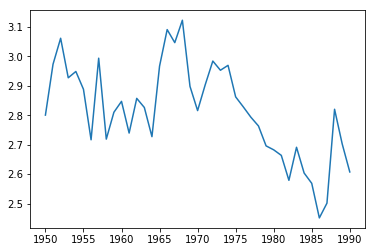

In [174]:
plt.plot(years, distances)

In [46]:
christianity = ['doop',
                'messias', 
                'katholicisme', 
                'christendom', 
                'verlossing',
                'protestant', 
                'christus', 
                'kerk']

In [47]:
def cossim(v1, v2, signed = True):
    c = np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
    if not signed:
        return abs(c)
    return c

In [48]:
cossim(model_vk['communisme'], model_ah_nrc['communisme'])

0.90139705

In [49]:
print(model_vk[christianity].var())
print(model_ah_nrc[christianity].var())

0.0033262984
0.0033295238


In [61]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [57]:
keys = ['communisme', 'kapitalisme', 'mensenrechten']

In [58]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_vk.most_similar(word, topn=100):
        words.append(similar_word)
        embeddings.append(model_vk[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [59]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()




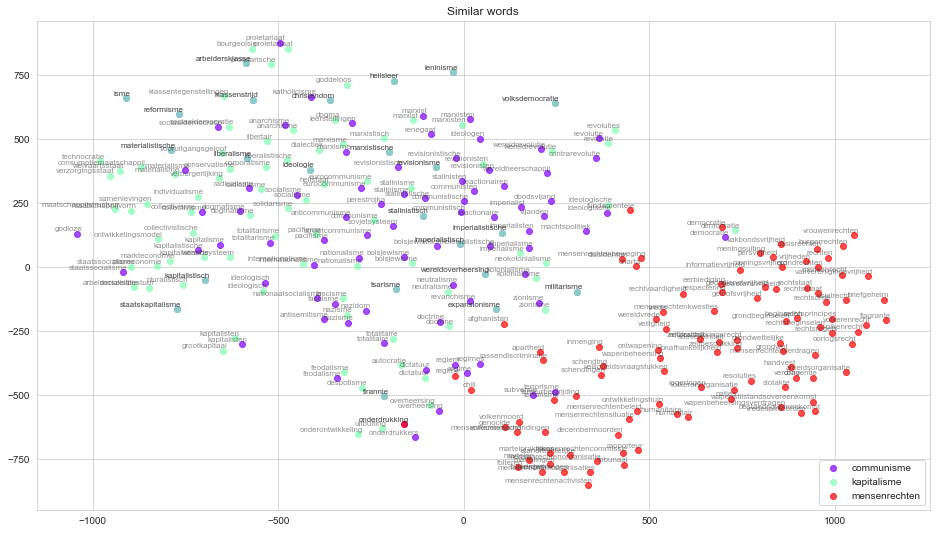

In [61]:
tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [3]:
def sampleVectors(vectors, size_frac):
    size = len(vectors)
    log(f'Sampling {size_frac * 100}% of {size} vectors')
    sample = int(size * size_frac)
    numFeat = len(vectors[0])
    sampVecs = np.ndarray((sample, numFeat), np.float32)
    indices = np.random.choice(len(vectors), sample)
    for i, val in enumerate(indices):
        sampVecs[i] = vectors[val]
    return sampVecs, indices

In [11]:
def reduceWithPCA(vectors, size):
    log(f'Reducing data to {size} features using PCA (fast)')
    pca = PCA(n_components=size)
    vecs = pca.fit_transform(vectors)

    return vecs

def reduceWithUMAP(vectors, size):
    log(f'Reducing data to {size} features using UMAP (slow-ish)')
    umap = UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=size)
    vecs = umap.fit_transform(vectors)

    return vecs

def reduceWithTSNE(vectors, size):
    log(f'Reducing data to {size} features using T-SNE (slow)')
    tsne = TSNE(n_components=size)
    vecs = tsne.fit_transform(vectors)

    return vecs

def PCA_then_UMAP(vectors, pca_size, umap_size):
    pcaVecs = reduceWithPCA(vectors, pca_size)
    umapVecs = reduceWithUMAP(pcaVecs, umap_size)

    return umapVecs


def PCA_then_TSNE(vectors, pca_size, tsne_size):
    pcaVecs = reduceWithPCA(vectors, pca_size)
    tsneVecs = reduceWithTSNE(pcaVecs, tsne_size)

    return tsneVecs

def clusterForColour(vectors, size):
    log(f'Using KMeans to generate {size} groups so the final graph is prettier...')
    clusters = KMeans(n_clusters=size).fit_predict(vectors)

    return clusters

# save in a format our graphit.html file is expecting (basically a json object)
def saveAsGraphitFile(model, vectors, indices, clusters, fname):
    log(f'Writing data to {fname}...')
    f = open(fname, "w", encoding='utf-8')
    f.write('var W2VDATA=[\n')
    for i, val in enumerate(indices):
        kw = model.index2word[val]
        if len(kw) > 1:
            v = vectors[i]
            f.write('["')
            f.write(kw.replace('"', '\\"'))  # keyword
            f.write('",')
            f.write(str(v[0]))  # x
            f.write(',')
            f.write(str(v[1]))  # y
            f.write(',')
            f.write(str(v[2]))  # z
            f.write(',')
            f.write(str(clusters[i]))  # colour group (just an integer)
            f.write('],\n')
    f.write('];\n')
    f.close()

    return fname

def plot2D(vectors):
    x = np.flipud(np.rot90(vectors[:], k=1, axes=(0, 1)))
    plt.scatter(x[0], x[1], c=clusters, marker=".")
    plt.show()
    plt.pause(5)
    
def log(msg):
    print(datetime.datetime.time(datetime.datetime.now()), msg)

In [175]:
model = models[15]

In [234]:
noun_model = np.ndarray((len(nouns[0]), 300), np.float32)

In [240]:
keys = [str(noun) for noun in nouns[0]]

In [247]:
vectors = PCA_then_UMAP(vectors, 50, 3)


13:01:34.720631 Reducing data to 50 features using PCA (fast)
13:01:35.661367 Reducing data to 3 features using UMAP (slow-ish)


In [248]:
clusters = clusterForColour(vectors, 10)

13:03:05.507725 Using KMeans to generate 10 groups so the final graph is prettier...


In [249]:
fname = saveAsGraphitFile(model, vectors, indices, clusters, './html/keyword-data.js')

log(f'Finished, now open html/graphit.html')

13:03:07.987667 Writing data to ./html/keyword-data.js...
13:03:08.405507 Finished, now open html/graphit.html


In [183]:
model.vocab

{'wel': <gensim.models.keyedvectors.Vocab at 0x198d1eac8>,
 'jaar': <gensim.models.keyedvectors.Vocab at 0x198d1ea58>,
 'twee': <gensim.models.keyedvectors.Vocab at 0x198d1eb38>,
 'amsterdam': <gensim.models.keyedvectors.Vocab at 0x198d1eb70>,
 'weer': <gensim.models.keyedvectors.Vocab at 0x198d1ebe0>,
 'uur': <gensim.models.keyedvectors.Vocab at 0x198d1ec50>,
 'nederland': <gensim.models.keyedvectors.Vocab at 0x198d1ec88>,
 'grote': <gensim.models.keyedvectors.Vocab at 0x198d1ecf8>,
 'moeten': <gensim.models.keyedvectors.Vocab at 0x198d1ed68>,
 'eerste': <gensim.models.keyedvectors.Vocab at 0x198d1edd8>,
 'nederlandse': <gensim.models.keyedvectors.Vocab at 0x198d1ee10>,
 'alle': <gensim.models.keyedvectors.Vocab at 0x198d1ee80>,
 'waar': <gensim.models.keyedvectors.Vocab at 0x198d1eef0>,
 'alleen': <gensim.models.keyedvectors.Vocab at 0x198d1ef60>,
 'zullen': <gensim.models.keyedvectors.Vocab at 0x198d1efd0>,
 'heer': <gensim.models.keyedvectors.Vocab at 0x198d1f080>,
 'komen': <gensi

In [192]:
keys = []
for k in model.vocab:
    keys.append(k)

In [193]:
keys

['wel',
 'jaar',
 'twee',
 'amsterdam',
 'weer',
 'uur',
 'nederland',
 'grote',
 'moeten',
 'eerste',
 'nederlandse',
 'alle',
 'waar',
 'alleen',
 'zullen',
 'heer',
 'komen',
 'drie',
 'man',
 'gaan',
 'gulden',
 'onze_correspondent',
 'zei',
 'gaat',
 'wij',
 'tussen',
 'goed',
 'percent',
 'mensen',
 'maken',
 'den_haag',
 'volgens',
 'tijd',
 'kwam',
 'staat',
 'echter',
 'werden',
 'toe',
 'onze',
 'werk',
 'laatste',
 'jan',
 'zeer',
 'rotterdam',
 'nieuws',
 'eigen',
 'mei',
 'steeds',
 'vooral',
 'zoals',
 'weg',
 'vier',
 'aantal',
 'land',
 'waarin',
 'regering',
 'hadden',
 'laten',
 'zien',
 'politie',
 'mee',
 'willen',
 'zelfs',
 'jarige',
 'plaats',
 'per',
 'leven',
 'tweede',
 'juli',
 'utrecht',
 'vrouw',
 'zouden',
 'ver',
 'dag',
 'maart',
 'vijf',
 'heel',
 'moest',
 'oude',
 'staan',
 'ging',
 'auto',
 'minder',
 'geven',
 'tijdens',
 'krijgen',
 'weinig',
 'miljoen_gulden',
 'deel',
 'zeggen',
 'groot',
 'week',
 'meter',
 'achter',
 'bijna',
 'programma',
 'bi

In [186]:
nlp = spacy.load('nl_core_news_sm', disable=['parser', 'ner'])

In [198]:
allowed_postags=['NOUN', 'PROPN']
nouns = []
for key in keys[:100]:
    
    key_ = nlp(" " key)
    nouns.append([k for k in key_ if key.pos_ in allowed_postags ])

AttributeError: 'str' object has no attribute 'pos_'

In [206]:
keys_ = nlp(' '.join(key for key in keys))

In [228]:
nouns = []
nouns.append([token for token in keys_ if token.pos_ in allowed_postags])

In [230]:
len(nouns[0])

28827

In [6]:
male_words = ['hij', 'zoon', 'zijn', 'hem','vader','man','jongen','mannelijk','broer','broeder','zoon','vaders','mannen',
        'broers','broeders','oom','ooms','neef','neven','neefje','broertje','neefjes','broertjes']

female_words =['zij','dochter','haar','moeder','vrouw','meisje','vrouwelijk','zus','zuster','dochters','moeders','vrouwen',
              'meisjes','nicht','nichtje','tante','tantes','nichtjes','zusjes']


In [7]:
occupations = ['concierge', 'statisticus', 'vroedvrouw', 'veilingmeester', 
               'fotograaf', 'geoloog', 'schoenmaker', 'atleet', 'kassier', 'cassiere', 
               'danser', 'huishoudster', 'accountant', 'natuurkundige', 'tuinman', 'tandarts', 
               'smid', 'psycholoog', 
               'supervisor', 'wiskundige', 'kleermaker', 'ontwerper', 'econoom', 'monteur', 
               'arbeider', 'postbeambte', 'makelaar', 'chemicus', 'bibliothecaris', 'bediende', 
               'administratief', 'musicus', 'portier', 'wetenschapper', 'timmerman', 'zeeman', 'instructeur', 
               'sheriff', 'piloot', 'inspecteur', 'metselaar', 'bakker', 'beheerder', 'architect', 'verzamelaar', 
               'exploitant', 'chirurg', 'bestuurder', 'schilder', 'dirigent', 'verpleegkundige', 'kok', 'ingenieur', 
               'gepensioneerd', 'verkoper', 'advocaat', 'pastoor', 'priester', 'arts', 'boer', 'bediende', 'manager', 'bewaker', 
               'kunstenaar', 'smid', 'ambtenaar', 'politie', 'dokter', 'professor', 'student', 'rechter', 'leraar', 
               'auteur', 'secretaresse', 'soldaat']

In [8]:
occupations_2 = ['statisticus', 'veilingmeester', 'fotograaf', 'geoloog', 'accountant', 
                 'fysicus', 'tandarts', 'psycholoog', 'wiskundige', 'ontwerper', 'econoom', 
                 'makelaar', 'chemicus', 'bibliothecaris', 'wetenschapper', 'instructeur', 'piloot', 
                 'beheerder', 'architect', 'chirurg', 'verpleegkundige', 
                 'ingenieur', 'advocaat', 'arts', 'manager', 'ambtenaar', 'dokter', 'professor', 'student', 'rechter', 
                 'leraar', 'auteur']

In [9]:
occupations_stereotype = ['leraar', 'auteur', 'monteur', 'makelaar', 'bakker', 
                          'arbeider', 'chirurg', 'tuinman', 'schilder', 
                          'tandarts', 'portier', 'atleet', 'manager', 'dirigent', 'timmerman', 
                          'huishoudster', 'secretaresse', 'econoom', 'geoloog', 'klerk', 'dokter', 
                          'rechter', 'arts', 'advocaat', 'kunstenaar', 'instructeur', 'danseres', 
                          'fotograaf', 'inspecteur', 'muzikant', 'soldaat', 'bibliothecaris', 
                          'professor', 'psycholoog', 'verpleegkundige', 'matroos', 'accountant', 
                          'architect', 'scheikundige', 'beheerder', 'fysicus', 'wetenschapper', 'boer']

In [10]:
adjectives_long = "ongeorganiseerd, slinkend, beïnvloedbaar, behoedzaam, onbeweeglijk, doelloos, ef- feminisch, onpeilbaar, grillig, onprincipe, onschuldig, reactief, providentieel, haatdragend, bizar, onpraktisch, sarcastisch, misleidend, imitatief, pedant, giftig, grillig, onzeker, vindingrijk, neurotisch, vergevingsgezind, profilerend, grillig, assertief, onverderfelijk, individualistisch, ontrouw, verontrustend, barbaars, hypnotisch, wraakzuchtig, opmerkzaam, losbandig, angstaanjagend, zelfgenoegzaam, luidruchtig, pretentieus, ongehoorzaam, smaakloos, zittend, gediplomeerd, regiment, zacht, bedrieglijk, impulsief, speels, sociaal, methodisch, eigenzinnig, idealistisch, jongensachtig, kaal, pompeus, onveranderlijk, sluw, punctueel, meelevend, onverdraagzaam, uitdagend, minachtend, bezitterig, opgevat, onvoorzichtig, plichtsgetrouw, beminnelijk, ontrouw, dromerig, dankbaar, vergeetachtig, ongebreideld, krachtig, onderdanig, roofzuchtig, fanatiek, onlogisch, opgeruimd, ambitieus, leergierig, aanpasbaar, verzoenend, listig, gedachteloos, bedrieglijk, f ruig, reflecterend, beledigend, onbetrouwbaar, stoïcijns, hysterisch, rustiek, geremd, uitgesproken, ongezond, asceet, skep- tisch, nauwgezet, beschouwend, ontspannen, sluw, gemanierd, buitensporig, lyrisch, rustig, cynisch, onverantwoordelijk, kwetsbaar, arrogant, overtuigend, pervers, standvastig, helder, jaloers, naïef, hebzuchtig, aanmatigend, onaangenaam, prikkelbaar, oneerlijk, discreet, sportief, haatdragend, ondankbaar, lichtzinnig, reactionair, bekwaam, laf, smerig, vraatzuchtig, dogmatisch, intuïtief, flauw, toegeeflijk, ontevreden, overheersend, gearticuleerd, fantasievol, ontmoedigend, verraderlijk, onderdrukt, humeurig, sensueel, onvriendelijk, optimistisch, onhandig, verachtelijk, gefocust, hooghartig, morbide, ongeordend, attent, humoristisch, preoccuped, luchtig, onpersoonlijk, beschaafd, vertrouwend, Respectvol, nauwgezet, geleerde, bijgelovig, tolerant, realistisch, kwaadaardig, irrationeel, gezond, kleurloos, mannelijk, geestig, inert, vooringenomen, frauduleus, bot, kinderachtig, broos, gedisciplineerd, responsief, moedig, bewi ldered, hoffelijk, koppig, afstandelijk, sentimenteel, atletisch, extravagant, brutaal, mannelijk, coöperatief, onstabiel, jeugdig, timide, aimabel, teruggetrokken, vurig, vertrouwelijk, ontspannen, fantasierijk, mystiek, sluw, gewetensvol, monsterlijk, grimmig, verhoor, lui, dynamisch, somber, lastig, abrupt, welsprekend, waardig, hartelijk, galant, welwillend, moederlijk, vaderlijk, patriottisch, agressief, competitief, elegant, flexibel, gracieus, energiek, taai, tegenstrijdig, verlegen, slordig, cau- zwaar, gepolijst, wijsgeer, gespannen, zorgzaam, achterdochtig, nuchter, netjes, transparant, verontrustend, gepassioneerd, gehoorzaam, gek, terughoudend, angstig, gedurfd, voorzichtig, veeleisend, ongeduldig, cerebraal, berekenend, grappig, eervol, terloops, delen, zelfzuchtig, geruïneerd, spontaan, bewonderenswaardig, conventioneel, vrolijk, eenzaam, rechtopstaand, stijf, enthousiast, onbeduidend, vies, subjectief, heldhaftig, dom, bescheiden, indrukwekkend, ordelijk, ambitieus, beschermend, dom, alert, destructief, opwindend, ruw, belachelijk, subtiel, volwassen, creati ve, grof, passief, onderdrukt, toegankelijk, charmant, slim, fatsoenlijk, ellendig, oppervlakkig, oppervlakkig, streng, winnend, gebalanceerd, emotioneel, rigide, onzichtbaar, wanhopig, wreed, romantisch, aangenaam, snel, sympathiek, plechtig, systematisch, vaag, vredig, bescheiden, saai, opportuun, loyaal, beslissend, willekeurig, ernstig, zelfverzekerd, conservatief, dwaas, matig, behulpzaam, delicaat, zachtaardig, toegewijd, vriendelijk, vrijgevig, betrouwbaar, dramatisch, nauwkeurig, rustig, gezond, aantrekkelijk, kunstmatig, progressief, oneven, verward, verhoudingsgewijs, briljant, intens, echt, verkeerd, rijden, stabiel, objectief, gevoelig, neutraal, streng, boos, diepgaand, glad, onwetend, grondig, logisch, intelligent, buitengewoon, experimenteel, stabiel, formeel, trouw, nieuwsgierig, gereserveerd, eerlijk, druk, opgeleid, liberaal, vriendelijk, efficiënt, lief, verrassend, mechanisch, schoon, kritisch, crim- inal, zacht, trots, rustig, zwak, angstig, vast, complex, groots, warm, langzaam, vals, extreem, nauw, afhankelijk, wijs, georganiseerd, puur, geregisseerd, droog, overduidelijk, populair, capabel, veilig, actief, onafhankelijk, gewoon, vast, praktisch, serieus, eerlijk, begrip, constant, koud, verantwoordelijk, diep, religieus, privé, eenvoudig, fysiek, origineel, werkend, sterk, modern, vastberaden, open, politiek, moeilijk, kennis, vriendelijk"
adjectives_long_ = [item.strip().lower() for item in adjectives_long.split(',')]

In [11]:
competentences = "vroegrijp, vindingrijk, nieuwsgierig, schrander, inventief, scherpzinnig, aanpasbaar, reflecterend, onderscheidend, intuïtief, vragend, oordeelkundig, analytisch, lichtgevend, eerbiedig, fantasierijk, sluw, attent, wijsgeer, slim, geniaal, slim, briljant, logisch, intelligent, apt, genius, wijs"
competentences_ = [item.strip().lower() for item in competentences.split(',')]

In [12]:
physical = "aanlokkelijk, wellustig, blozend, huiselijk, mollig, sensueel, schitterend, slank, kaal, athiek, modieus, stout, lelijk, gespierd, slank, zwak, knap, gezond, aantrekkelijk, dik, zwak, dun, mooi, mooi, sterk"
physical_ = [item.strip() for item in physical.split(',')]

In [3]:
## Loading Embeddings
models = []
for year in range(1950,1989, 10):
    models.append(KeyedVectors.load_word2vec_format('../embeddings/all/10/{}_{}.w2v'.format(year, year+9), binary=True))


NameError: name 'KeyedVectors' is not defined

In [2]:
models

NameError: name 'models' is not defined

In [ ]:
# Aligning embeddings


embeddings_t0.init_sims(replace=True)
    embeddings_t1.init_sims(replace=True)
    embeddings_t1 = smart_procrustes_align_gensim(embeddings_t0, embeddings_t1)

In [48]:
seeds_ = [occupations, physical_, adjectives_long_, competentences_]
seed_names = ['occupations', 'physical', 'adjectives', 'competentences']

counts_list = {}

for name, list_ in zip(seed_names, seeds_):
    counts_avg = []
    for model in models:
        counts = []
        for word in list_:
            try:
                counts.append(model.vocab[word].count)
            except: 
                pass
        counts_avg.append(np.mean(counts))
    counts_list[name] = counts_avg

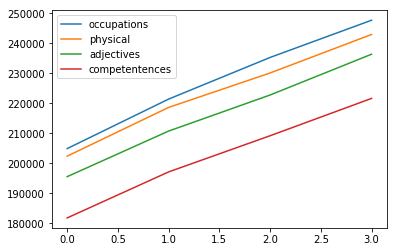

In [49]:
for name in seed_names:
    plt.plot(counts_list[name], label=name)
    plt.legend()

In [50]:
seeds_ = [occupations, physical_, adjectives_long_, competentences_]
seed_names = ['occupations', 'physical', 'adjectives', 'competentences']

variance_list = {}

for name, list_ in zip(seed_names, seeds_):
    variances_ = []
    for model in models:
        variance = []
        for word in list_:
            try:
                variance.append(model[word])
            except: 
                pass
        variances_.append(np.mean(np.var(variance, axis=0)))
    variance_list[name] = variances_

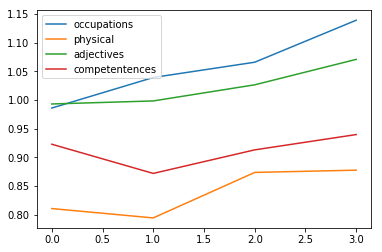

In [51]:
for name in seed_names:
    plt.plot(variance_list[name], label=name)
    plt.legend()

In [63]:
male_words_valid = [word for word in male_words if word in model.vocab]
female_words_valid = [word for word in female_words if word in model.vocab]
occupations_valid = [word for word in occupations if word in model.vocab]

In [64]:
vectors_male = np.mean(np.array([model[word] for word in male_words_valid]), axis=0)
vectors_female = np.mean(np.array([model[word] for word in female_words_valid]), axis=0)
vectors_occupations = np.mean(np.array([model[word] for word in occupations_valid]), axis=0)

In [68]:
m_both_vectors = []
m_first_avg = []
m_second_avg = []
m_both_vectors.append(calc_distance_between_vectors(vectors_male,vectors_occupations))
m_first_avg.append(np.mean([calc_distance_between_vectors(vectors_male, model[word]) for word in occupations_valid]))
m_second_avg.append(np.mean([calc_distance_between_vectors(model[word], vectors_occupations) for word in male_words_valid]))



In [67]:
f_both_vectors = []
f_first_avg = []
f_second_avg = []
f_both_vectors.append(calc_distance_between_vectors(vectors_female,vectors_occupations))
f_first_avg.append(np.mean([calc_distance_between_vectors(vectors_female, model[word]) for word in occupations_valid]))
f_second_avg.append(np.mean([calc_distance_between_vectors(model[word], vectors_occupations) for word in female_words_valid]))



In [74]:
distances = []
for model in models:
    vectors_male = np.mean(np.array([model[word] for word in male_words_valid]), axis=0)
    distances.append(np.mean([calc_distance_between_vectors(vectors_male, model[word]) for word in occupations_valid]))


In [ ]:
male_bias = np.mean([calc_distance_between_vectors(vectors_male, model[word]) for word in competentences_words_valid])
female_bias = np.mean([calc_distance_between_vectors(vectors_female, model[word]) for word in occupations_words_valid])

In [22]:
female_bias

NameError: name 'female_bias' is not defined

In [23]:
bias_male = []
bias_female = []
for index, item in enumerate(competentences_words_valid):
    try:
        physical_vector = model[item]
        bias_male.append(calc_distance_between_vectors(vectors_male, physical_vector))
        bias_female.append(calc_distance_between_vectors(vectors_female, physical_vector))
    except:
        pass
    
    

In [24]:
bias_female

[7.6082954,
 13.204217,
 12.728341,
 9.252131,
 14.13075,
 12.884308,
 8.649318,
 9.477627,
 10.019156,
 13.258773,
 8.921788,
 15.906259,
 9.426593,
 11.813823,
 10.361548,
 11.958739,
 16.847813,
 12.388122,
 12.290409,
 13.212222,
 12.290409,
 13.270909,
 13.0239315,
 13.342157,
 16.938295,
 12.931973]

In [25]:
plt.figure(figsize=(10,10))
for i,type in enumerate(physical_words_valid):
    
    x = bias_male[i]
    y = bias_female[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.xlabel('male')
    plt.ylabel('female')
    plt.xlim(5, 16)
    plt.ylim(5, 16)
plt.show()

NameError: name 'physical_words_valid' is not defined

<Figure size 720x720 with 0 Axes>

In [62]:
model.similar_by_vector(vectors_female, topn=50, restrict_vocab=None)

[('moeder', 0.8727827072143555),
 ('zuster', 0.8243966102600098),
 ('nichtje', 0.8140373229980469),
 ('zusje', 0.812921941280365),
 ('grootmoeder', 0.8061124086380005),
 ('zus', 0.8054584264755249),
 ('vrouw', 0.7921228408813477),
 ('vader', 0.7832504510879517),
 ('dochter', 0.7769799828529358),
 ('vriendin', 0.7621933817863464),
 ('meisje', 0.7591038942337036),
 ('schoonmoeder', 0.7557535171508789),
 ('dochtertje', 0.7544666528701782),
 ('zoontje', 0.7499704360961914),
 ('tante', 0.7488413453102112),
 ('vriendinnetje', 0.7396310567855835),
 ('zoons', 0.7367556691169739),
 ('zusjes', 0.7348017692565918),
 ('dienstmeisje', 0.7308087944984436),
 ('zoon', 0.7275298833847046),
 ('kleindochter', 0.7269845008850098),
 ('buurmeisje', 0.7260289788246155),
 ('dochtertjes', 0.7225672006607056),
 ('verloofde', 0.7225208282470703),
 ('echtgenoot', 0.7124402523040771),
 ('huishoudster', 0.7078431844711304),
 ('getrouwd', 0.705450713634491),
 ('buurvrouw', 0.6978256702423096),
 ('ongetrouwde', 0.697